## in this Script we create the potentially fourth figure of the paper 

##### what we do is as follows: We run two Sweepers and trade-offs between time-horizon and income goal with the carbon budget transgression as outcome. The defining distinction between both sweepers is whether high income groups (defined as higher than the scenario specific income goal) remain at their current income or degrow their income.

this is the threshold_norm 0.2821811873887704
this is the below_colors [[0.27058824 0.45882353 0.70588235 1.        ]
 [0.27409458 0.4622376  0.70768166 1.        ]
 [0.2787697  0.4667897  0.71008074 1.        ]
 [0.28227605 0.47020377 0.71188005 1.        ]
 [0.28695117 0.47475586 0.71427912 1.        ]
 [0.2916263  0.47930796 0.7166782  1.        ]
 [0.29513264 0.48272203 0.71847751 1.        ]
 [0.29980777 0.48727413 0.72087659 1.        ]
 [0.30331411 0.4906882  0.72267589 1.        ]
 [0.30798923 0.49524029 0.72507497 1.        ]
 [0.31266436 0.49979239 0.72747405 1.        ]
 [0.3161707  0.50320646 0.72927336 1.        ]
 [0.32084583 0.50775855 0.73167243 1.        ]
 [0.32435217 0.51117263 0.73347174 1.        ]
 [0.3290273  0.51572472 0.73587082 1.        ]
 [0.33370242 0.52027682 0.7382699  1.        ]
 [0.33720877 0.52369089 0.7400692  1.        ]
 [0.34188389 0.52824298 0.74246828 1.        ]
 [0.34539023 0.53165705 0.74426759 1.        ]
 [0.35006536 0.53620915 0.74666667 1

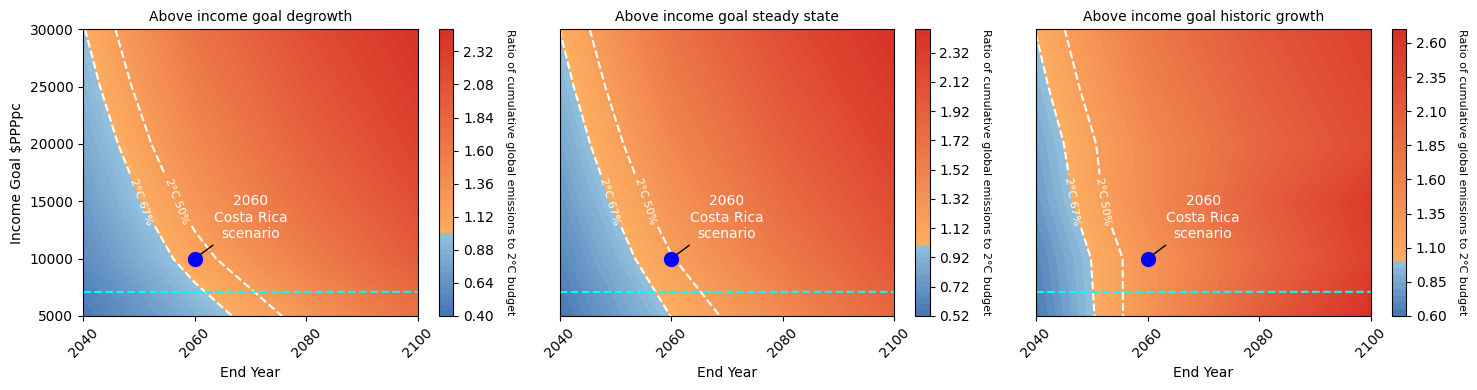

In [1]:
# Import all things necessary
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.cm as cm
from scenariosweeper_class import ScenarioSweeper
import matplotlib.gridspec as gridspec


# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
ax3 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)


# calculate how much emissions are emitted in a given scenario run and how far above this is the carbon budget by summing the yearly emissions of all countries
# Sweeper 1 
end_year_values = [2040, 2060, 2080, 2100]
income_goal_values = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
hysteresis_tech_progress_values = [0.01]
gdp_assumption_values = ["constant_ratio"]
pop_growth_assumption_values = ["semi_log_model"]
tech_evolution_assumption_values = ["plausible"]
tech_hysteresis_assumption_values = ["off"]
steady_state_high_income_assumption_values = ["off"]
sweeper1 = ScenarioSweeper(end_year_values,
                           income_goal_values,
                           carbon_budget_values,
                           hysteresis_tech_progress_values,
                           gdp_assumption_values,
                           pop_growth_assumption_values,
                           tech_evolution_assumption_values,
                           tech_hysteresis_assumption_values,
                           steady_state_high_income_assumption_values)


# Sweeper 2
end_year_values2 = [2040, 2060, 2080, 2100]
income_goal_values2 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values2 = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
hysteresis_tech_progress_values2 = [0.01]
gdp_assumption_values2 = ["constant_ratio"]
pop_growth_assumption_values2 = ["semi_log_model"]
tech_evolution_assumption_values2 = ["plausible"]
tech_hysteresis_assumption_values2 = ["off"]
steady_state_high_income_assumption_values2 = ["on"]
sweeper2 = ScenarioSweeper(end_year_values2,
                            income_goal_values2,
                            carbon_budget_values2,
                            hysteresis_tech_progress_values2,
                            gdp_assumption_values2,
                            pop_growth_assumption_values2,
                            tech_evolution_assumption_values2,
                            tech_hysteresis_assumption_values2,
                            steady_state_high_income_assumption_values2)


# Sweeper 3
end_year_values3 = [2040, 2060, 2080, 2100]
income_goal_values3 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values3 = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
hysteresis_tech_progress_values3 = [0.01]
gdp_assumption_values3 = ["constant_ratio"]
pop_growth_assumption_values3 = ["semi_log_model"]
tech_evolution_assumption_values3 = ["plausible"]
tech_hysteresis_assumption_values3 = ["off"]
steady_state_high_income_assumption_values3 = ["on_with_growth"]
sweeper3 = ScenarioSweeper(end_year_values3,
                            income_goal_values3,
                            carbon_budget_values3,
                            hysteresis_tech_progress_values3,
                            gdp_assumption_values3,
                            pop_growth_assumption_values3,
                            tech_evolution_assumption_values3,
                            tech_hysteresis_assumption_values3,
                            steady_state_high_income_assumption_values3)


output_sweeper1 = sweeper1.run_scenarios() 
output_sweeper2 = sweeper2.run_scenarios()
output_sweeper3 = sweeper3.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input1 = output_sweeper1[0] # output now will be transformed to an input for the plots function
input2 = output_sweeper2[0] # output now will be transformed to an input for the plots function
input3 = output_sweeper3[0] # output now will be transformed to an input for the plots function

# Create a new figure with four axes
sweeper1.plot_total_emissions_trade_off(input1, ["end_year", "income_goal"], ax = ax1, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)
sweeper2.plot_total_emissions_trade_off(input2, ["end_year", "income_goal"], ax = ax2, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)   
sweeper3.plot_total_emissions_trade_off(input3, ["end_year", "income_goal"], ax = ax3, fixed_color_scale=False, annotations_plot = False, colorscaleon = True)

# After plotting:
# For ax2 and ax3, remove y-axis labels, tick labels, and tick markers
ax2.set_ylabel('')
ax2.set_yticks([])
ax3.set_ylabel('')
ax3.set_yticks([])

# delete y axis ticklabels
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# Setting titles for each subplot
ax3.set_title("Above income goal historic growth", fontsize=10)
ax2.set_title("Above income goal steady state", fontsize = 10)
ax1.set_title("Above income goal degrowth", fontsize = 10)  # 'pad' adjusts the distance between the title and the plot


# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax1.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax2.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax3.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
ax1.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax2.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax3.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

plt.tight_layout()
# save high resolution as fig4
plt.savefig('fig4.png', dpi=300, bbox_inches='tight')
plt.show()

this is the threshold_norm 0.27933279309837666
this is the below_colors [[0.27058824 0.45882353 0.70588235 1.        ]
 [0.27409458 0.4622376  0.70768166 1.        ]
 [0.2787697  0.4667897  0.71008074 1.        ]
 [0.28227605 0.47020377 0.71188005 1.        ]
 [0.28695117 0.47475586 0.71427912 1.        ]
 [0.2916263  0.47930796 0.7166782  1.        ]
 [0.29513264 0.48272203 0.71847751 1.        ]
 [0.29980777 0.48727413 0.72087659 1.        ]
 [0.30448289 0.49182622 0.72327566 1.        ]
 [0.30798923 0.49524029 0.72507497 1.        ]
 [0.31266436 0.49979239 0.72747405 1.        ]
 [0.31733948 0.50434448 0.72987313 1.        ]
 [0.32084583 0.50775855 0.73167243 1.        ]
 [0.32552095 0.51231065 0.73407151 1.        ]
 [0.33019608 0.51686275 0.73647059 1.        ]
 [0.33370242 0.52027682 0.7382699  1.        ]
 [0.33837755 0.52482891 0.74066897 1.        ]
 [0.34305267 0.52938101 0.74306805 1.        ]
 [0.34655902 0.53279508 0.74486736 1.        ]
 [0.35123414 0.53734717 0.74726644 

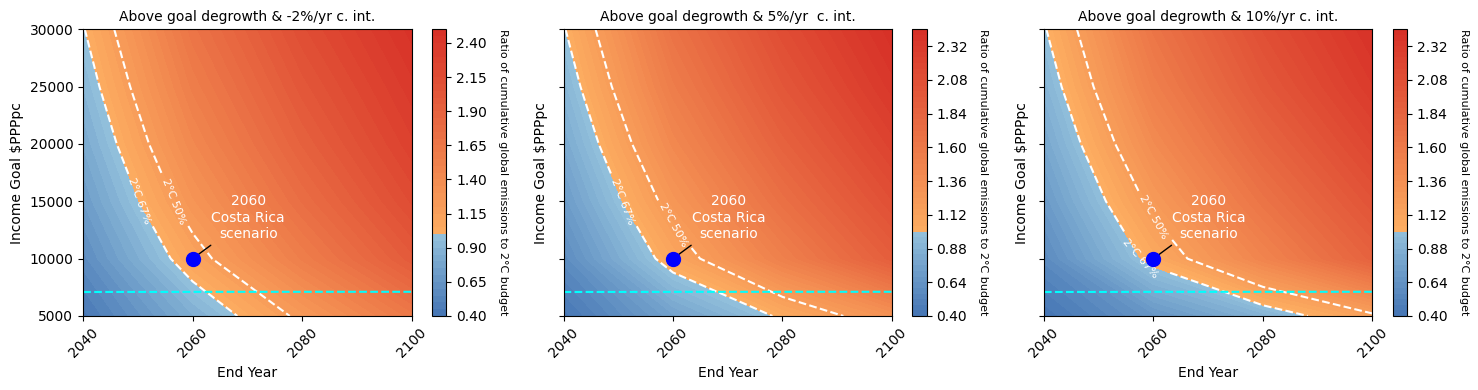

In [2]:

# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed
# Create subplots
ax4 = fig.add_subplot(gs[0, 0])  # First row, first column
ax5 = fig.add_subplot(gs[0, 1])  # First row, second column
ax6 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# Sweeper 4
end_year_values4 = [2040, 2060, 2080, 2100]
income_goal_values4 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values4 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
hysteresis_tech_progress_values4 = [0.02]
gdp_assumption_values4 = ["constant_ratio"]
pop_growth_assumption_values4 = ["semi_log_model"]
tech_evolution_assumption_values4 = ["plausible"]
tech_hysteresis_assumption_values4 = ["on"]
steady_state_high_income_assumption_values4 = ["off"]
sweeper4 = ScenarioSweeper(end_year_values4,
                            income_goal_values4,
                            carbon_budget_values4,
                            hysteresis_tech_progress_values4,
                            gdp_assumption_values4,
                            pop_growth_assumption_values4,
                            tech_evolution_assumption_values4,
                            tech_hysteresis_assumption_values4,
                            steady_state_high_income_assumption_values4)

# Sweeper 5
end_year_values5 = [2040, 2060, 2080, 2100]
income_goal_values5 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values5 = [1150*0.95 - 2*35]
hysteresis_tech_progress_values5 = [0.05]
gdp_assumption_values5 = ["constant_ratio"]
pop_growth_assumption_values5 = ["semi_log_model"]
tech_evolution_assumption_values5 = ["plausible"]
tech_hysteresis_assumption_values5 = ["on"]
steady_state_high_income_assumption_values5 = ["off"]
sweeper5 = ScenarioSweeper(end_year_values5,
                           income_goal_values5,
                           carbon_budget_values5,
                           hysteresis_tech_progress_values5,
                           gdp_assumption_values5,
                           pop_growth_assumption_values5,
                           tech_evolution_assumption_values5,
                           tech_hysteresis_assumption_values5,
                           steady_state_high_income_assumption_values5)


# Sweeper 6
end_year_values6 = [2040, 2060, 2080, 2100]
income_goal_values6 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values6 = [1150*0.95 - 2*35]
hysteresis_tech_progress_values6 = [0.1]
gdp_assumption_values6 = ["constant_ratio"]
pop_growth_assumption_values6 = ["semi_log_model"]
tech_evolution_assumption_values6 = ["plausible"]
tech_hysteresis_assumption_values6 = ["on"]
steady_state_high_income_assumption_values6 = ["off"]
sweeper6 = ScenarioSweeper(end_year_values6,
                           income_goal_values6,
                           carbon_budget_values6,
                           hysteresis_tech_progress_values6,
                           gdp_assumption_values6,
                           pop_growth_assumption_values6,
                           tech_evolution_assumption_values6,
                           tech_hysteresis_assumption_values6,
                           steady_state_high_income_assumption_values6)

output_sweeper4 = sweeper4.run_scenarios()
output_sweeper5 = sweeper5.run_scenarios()
output_sweeper6 = sweeper6.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input4 = output_sweeper4[0] # output now will be transformed to an input for the plots function
input5 = output_sweeper5[0] # output now will be transformed to an input for the plots function
input6 = output_sweeper6[0] # output now will be transformed to an input for the plots function
# Create a new figure with four axes
sweeper4.plot_total_emissions_trade_off(input4, ["end_year", "income_goal"], ax = ax4, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)
sweeper5.plot_total_emissions_trade_off(input5, ["end_year", "income_goal"], ax = ax5, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)   
sweeper6.plot_total_emissions_trade_off(input6, ["end_year", "income_goal"], ax = ax6, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)

ax4.set_title("Above goal degrowth & -2%/yr c. int.", fontsize = 10)
ax5.set_title("Above goal degrowth & 5%/yr  c. int.", fontsize = 10)
ax6.set_title("Above goal degrowth & 10%/yr c. int.", fontsize = 10)

ax5.set_yticklabels([])
ax6.set_yticklabels([])


# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax5.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax6.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
ax4.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax5.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax6.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')


plt.tight_layout()
# save high resolution as supp_figx
plt.savefig('supp_figx.png', dpi=300, bbox_inches='tight')
plt.show()


this is the threshold_norm 0.11486037747122778
this is the below_colors [[0.27058824 0.45882353 0.70588235 1.        ]
 [0.28110727 0.46906574 0.71128028 1.        ]
 [0.2916263  0.47930796 0.7166782  1.        ]
 [0.30214533 0.48955017 0.72207612 1.        ]
 [0.31266436 0.49979239 0.72747405 1.        ]
 [0.32318339 0.5100346  0.73287197 1.        ]
 [0.33370242 0.52027682 0.7382699  1.        ]
 [0.34539023 0.53165705 0.74426759 1.        ]
 [0.35590927 0.54189927 0.74966551 1.        ]
 [0.3664283  0.55214148 0.75506344 1.        ]
 [0.37694733 0.5623837  0.76046136 1.        ]
 [0.38746636 0.57262591 0.76585928 1.        ]
 [0.39798539 0.58286813 0.77125721 1.        ]
 [0.40850442 0.59311034 0.77665513 1.        ]
 [0.42019223 0.60449058 0.78265283 1.        ]
 [0.43071126 0.6147328  0.78805075 1.        ]
 [0.4412303  0.62497501 0.79344867 1.        ]
 [0.45174933 0.63521722 0.7988466  1.        ]
 [0.46226836 0.64545944 0.80424452 1.        ]
 [0.47278739 0.65570165 0.80964245 

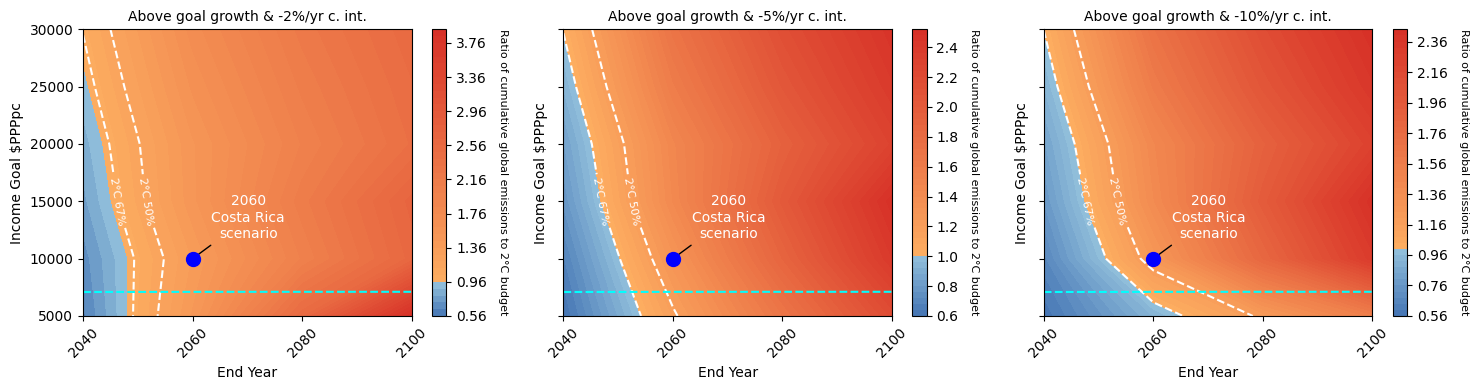

In [3]:
# last thing we should test is an above income goal growth regime with decarbonisation. to see whether decarbonisation or degrowth is more important

# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed
# Create subplots
ax7 = fig.add_subplot(gs[0, 0])  # First row, first column
ax8 = fig.add_subplot(gs[0, 1])  # First row, second column
ax9 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# Sweeper 7
end_year_values7 = [2040, 2060, 2080, 2100]
income_goal_values7 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values7 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
hysteresis_tech_progress_values7 = [0.02]
gdp_assumption_values7 = ["constant_ratio"]
pop_growth_assumption_values7 = ["semi_log_model"]
tech_evolution_assumption_values7 = ["plausible"]
tech_hysteresis_assumption_values7 = ["on"]
steady_state_high_income_assumption_values7 = ["on_with_growth"]
sweeper7 = ScenarioSweeper(end_year_values7,
                           income_goal_values7,
                           carbon_budget_values7,
                           hysteresis_tech_progress_values7,
                           gdp_assumption_values7,
                           pop_growth_assumption_values7,
                           tech_evolution_assumption_values7,
                           tech_hysteresis_assumption_values7,
                           steady_state_high_income_assumption_values7)

# Sweeper 8
end_year_values8 = [2040, 2060, 2080, 2100]
income_goal_values8 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values8 = [1150*0.95 - 2*35]
hysteresis_tech_progress_values8 = [0.05]
gdp_assumption_values8 = ["constant_ratio"]
pop_growth_assumption_values8 = ["semi_log_model"]
tech_evolution_assumption_values8 = ["plausible"]
tech_hysteresis_assumption_values8 = ["on"]
steady_state_high_income_assumption_values8 = ["on_with_growth"]
sweeper8 = ScenarioSweeper(end_year_values8,
                           income_goal_values8,
                           carbon_budget_values8,
                           hysteresis_tech_progress_values8,
                           gdp_assumption_values8,
                           pop_growth_assumption_values8,
                           tech_evolution_assumption_values8,
                           tech_hysteresis_assumption_values8,
                           steady_state_high_income_assumption_values8)

# Sweeper 9
end_year_values9 = [2040, 2060, 2080, 2100]
income_goal_values9 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values9 = [1150*0.95 - 2*35]
hysteresis_tech_progress_values9 = [0.1]
gdp_assumption_values9 = ["constant_ratio"]
pop_growth_assumption_values9 = ["semi_log_model"]
tech_evolution_assumption_values9 = ["plausible"]
tech_hysteresis_assumption_values9 = ["on"]
steady_state_high_income_assumption_values9 = ["on_with_growth"]
sweeper9 = ScenarioSweeper(end_year_values9,
                           income_goal_values9,
                           carbon_budget_values9,
                           hysteresis_tech_progress_values9,
                           gdp_assumption_values9,
                           pop_growth_assumption_values9,
                           tech_evolution_assumption_values9,
                           tech_hysteresis_assumption_values9,
                           steady_state_high_income_assumption_values9)


                            

output_sweeper7 = sweeper7.run_scenarios()
output_sweeper8 = sweeper8.run_scenarios()
output_sweeper9 = sweeper9.run_scenarios()

# output[0] is the emissions and output[1] is the gdp growth rate globally
input7 = output_sweeper7[0] # output now will be transformed to an input for the plots function
input8 = output_sweeper8[0] # output now will be transformed to an input for the plots function
input9 = output_sweeper9[0] # output now will be transformed to an input for the plots function

# Create a new figure with four axes
sweeper7.plot_total_emissions_trade_off(input7, ["end_year", "income_goal"], ax = ax7, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)
sweeper8.plot_total_emissions_trade_off(input8, ["end_year", "income_goal"], ax = ax8, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)   
sweeper9.plot_total_emissions_trade_off(input9, ["end_year", "income_goal"], ax = ax9, fixed_color_scale = False, annotations_plot = False, colorscaleon = True)

ax7.set_title("Above goal growth & -2%/yr c. int.", fontsize = 10)
ax8.set_title("Above goal growth & -5%/yr c. int.", fontsize = 10)
ax9.set_title("Above goal growth & -10%/yr c. int.", fontsize = 10)

ax8.set_yticklabels([])
ax9.set_yticklabels([])


# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax7.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax8.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax9.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
ax7.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax8.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax9.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')


plt.tight_layout()
# save high resolution as supp_figx
plt.savefig('supp_figyy.png', dpi=300, bbox_inches='tight')
plt.show()